In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [3]:
song = pd.read_csv('../../data/training_data.csv', na_values='?').dropna()

song.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
369,0.993,0.581,215000,0.2330,0.872000,9,0.0737,-17.979,1,0.0460,129.506,4,0.888,1
220,0.175,0.814,268005,0.7790,0.000671,11,0.0605,-3.271,1,0.2350,93.430,4,0.544,0
8,0.992,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
21,0.360,0.524,115773,0.6000,0.013000,0,0.3410,-6.767,1,0.0352,112.682,4,0.722,1
148,0.916,0.605,125867,0.3140,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1


In [4]:
attr = ['acousticness','danceability','duration',
        'energy','instrumentalness','key','liveness',
        'loudness','mode','speechiness','tempo',
        'time_signature','valence']
label = 'label'

# the colinearity between different feature by geometric
# pd.plotting.scatter_matrix(song[attr], figsize = (10,10))
# plt.show()

# the colinearity between different feature by numeric
# song[attr].corr()

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(song[attr],
                                                   song[label],
                                                   test_size=0.2,
                                                   random_state=1,
                                                   shuffle=True)

In [6]:
model = ensemble.GradientBoostingClassifier()
para_grid = {
    'learning_rate': [0.05,0.1,0.5],
    'n_estimators': [10,20,100,200,500],
    'max_depth': [3,6,9,10,12],
    'min_samples_leaf': [3,6,9,10,12],
    'loss': ['deviance','exponential']
}
grid_cv = GridSearchCV(model, para_grid, cv = 5)
grid_cv.fit(xtrain, ytrain)
pred = grid_cv.predict(xtest)

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 12, 'min_samples_leaf': 12, 'n_estimators': 500}
accuracy 0.7933333333333333
f1-score 0.8143712574850299


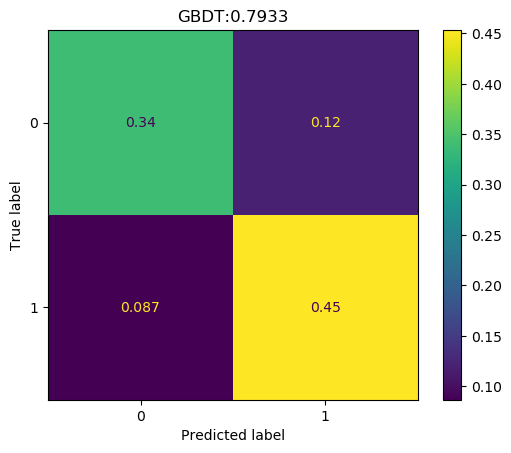

In [10]:
print(grid_cv.best_params_)
print('accuracy', accuracy_score(pred, ytest))
print('f1-score', f1_score(pred, ytest))
plot_confusion_matrix(grid_cv, xtest, ytest, normalize = 'all')



plt.title("GBDT:{:.4f}".format(accuracy_score(pred, ytest)))
plt.savefig("../../result/GBDT")
plt.show()